## Convolutional Neural Network (CNN)

This tutorial demonstrates training a simple Convolutional Neural Network (CNN) to classify CIFAR images.

[Tutorial Link](https://www.tensorflow.org/tutorials/images/cnn)

In [22]:
import tensorflow as tf
import datetime
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime

print(f"TensorFlow Version: {tf.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")

TensorFlow Version: 2.10.1
NumPy Version: 1.26.4
Matplotlib Version: 3.9.2


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(f'Min,Max of Train Images: {np.min(train_images), np.max(train_images)}')
print(f'Min,Max of Test Images: {np.min(test_images), np.max(test_images)}')
print(f'Train Labels: {np.unique(train_labels)}')

Min,Max of Train Images: (0, 255)
Min,Max of Test Images: (0, 255)
Train Labels: [0 1 2 3 4 5 6 7 8 9]


In [5]:
print(f'Train Images Shape: {train_images.shape}')
print(f'Test Images Shape: {test_images.shape}')

Train Images Shape: (50000, 32, 32, 3)
Test Images Shape: (10000, 32, 32, 3)


### Apply Min-Max Normalization

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0 # Normalize pixel values to be between 0 and 1

print(f'Min,Max of Train Images: {np.min(train_images), np.max(train_images)}')
print(f'Min,Max of Test Images: {np.min(test_images), np.max(test_images)}')

Min,Max of Train Images: (0.0, 1.0)
Min,Max of Test Images: (0.0, 1.0)


In [7]:
train_images[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

### Plot the first 25 images from the training set and display the class name below each image

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f'Class Names Length: {len(class_names)}')
print(f'Class Names:')
for index, class_name in enumerate(class_names):
    print(f'\t{index + 1}. {class_name}')

Class Names Length: 10
Class Names:
	1. airplane
	2. automobile
	3. bird
	4. cat
	5. deer
	6. dog
	7. frog
	8. horse
	9. ship
	10. truck


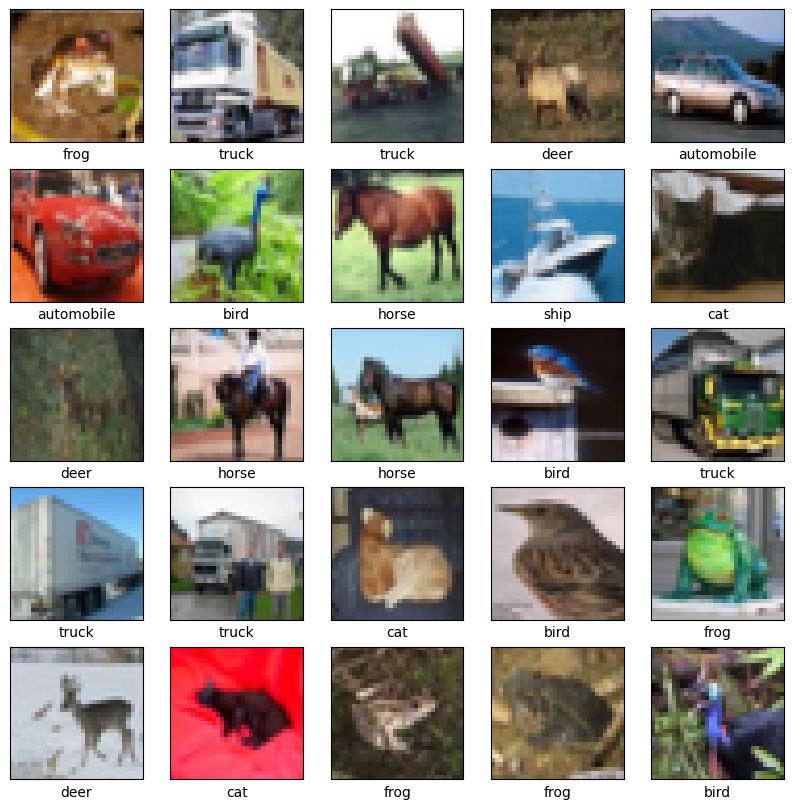

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

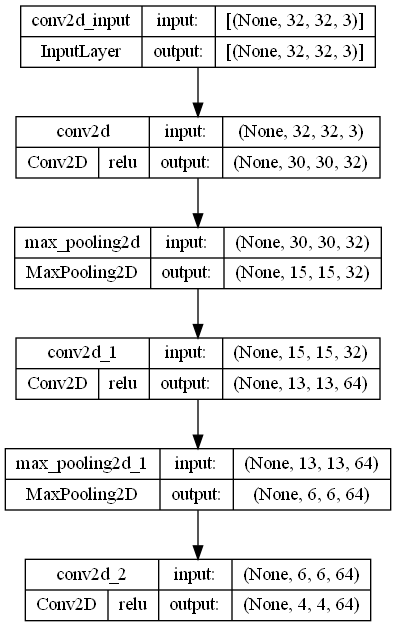

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

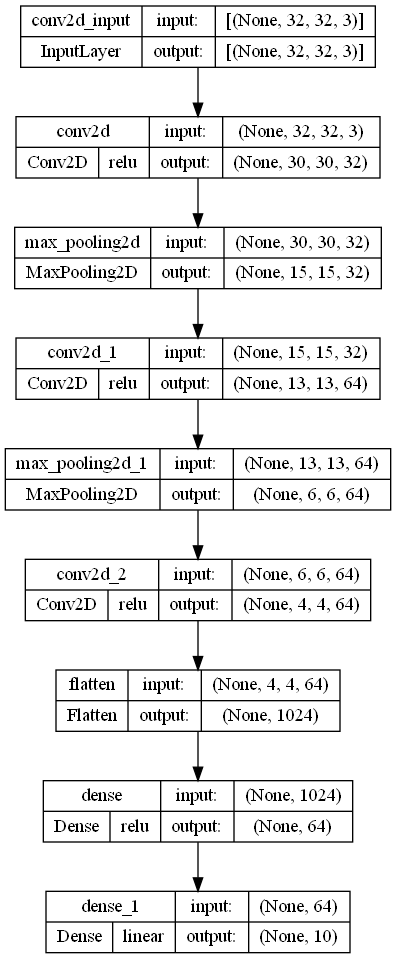

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_images, train_labels, epochs=10, verbose=True,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 10ms/step - loss: 1.5159 - accuracy: 0.4438 - val_loss: 1.2267 - val_accuracy: 0.5590
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1518 - accuracy: 0.5892 - val_loss: 1.0718 - val_accuracy: 0.6243
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9833 - accuracy: 0.6534 - val_loss: 0.9990 - val_accuracy: 0.6457
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8887 - accuracy: 0.6879 - val_loss: 0.9827 - val_accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8190 - accuracy: 0.7125 - val_loss: 0.8780 - val_accuracy: 0.6979
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7588 - accuracy: 0.7338 - val_loss: 0.8675 - val_accuracy: 0.6984
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7109 - accuracy: 0.7512 - val_loss: 0.8473 - va

313/313 - 2s - loss: 0.9299 - accuracy: 0.6947 - 2s/epoch - 8ms/step


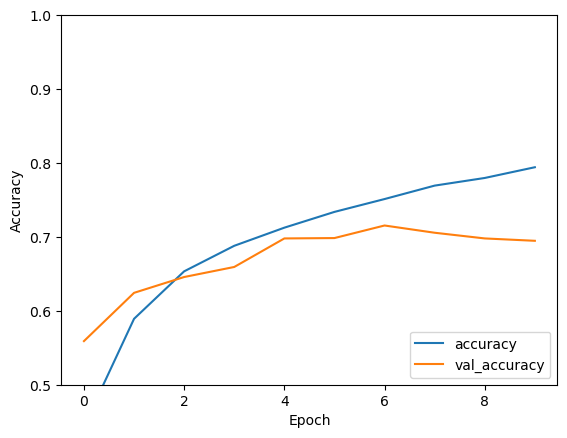

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [23]:
print(test_acc)

0.6947000026702881


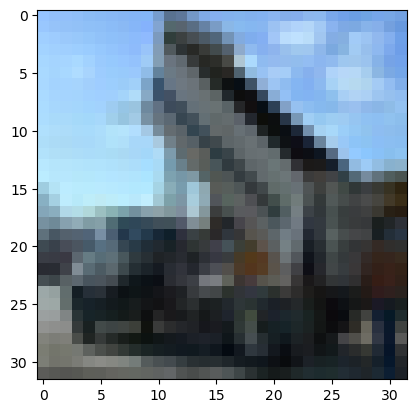

In [75]:
plt.imshow(test_images[50])
plt.show()

In [76]:
prediction = model.predict(test_images[50].reshape(1, 32, 32, 3))
prediction

1/1 [==============================] - 0s 20ms/step


array([[ 4.8384576 , -0.717448  ,  1.3683729 , -2.8168755 , -2.229259  ,
        -5.520223  , -1.857629  ,  0.94415116, -3.8571787 ,  5.00124   ]],
      dtype=float32)

In [77]:
predicted_class = np.argmax(prediction)
actual_class = test_labels[50][0]

print(f"Predicted Class: {class_names[predicted_class]}")
print(f"Actual Class: {class_names[actual_class]}")

Predicted Class: truck
Actual Class: truck
